### Import Knet & ONNX

In [1]:
using Knet

In [2]:
KnetOnnx_PATH = "/Users/egeersu/Desktop/KnetOnnx.jl/src"
push!(LOAD_PATH, KnetOnnx_PATH)
using KnetOnnx

### Import MNIST Dataset

In [3]:
include(Knet.dir("data","mnist.jl"))
dtrn,dtst = mnistdata(xsize=(784,:));

┌ Info: Loading MNIST...
└ @ Main /Users/egeersu/.julia/packages/Knet/bTNMd/data/mnist.jl:33


### Read ONNX Graph

In [4]:
file_path = "mlp.onnx"
graph = ONNXtoGraph(file_path);

In [5]:
PrintGraph(graph)

model inputs: ["input.1"]
model outputs: ["7"]
(op1) Gemm
	input1: input.1
	input2: fc1.weight
	input3: fc1.bias
	output1: 5
(op2) Relu
	input1: 5
	output1: 6
(op3) Gemm
	input1: 6
	input2: fc2.weight
	input3: fc2.bias
	output1: 7


### Re-construct model in Knet

In [6]:
model = KnetModel(file_path);

In [7]:
x,y = first(dtrn)
model(x)

10×100 Array{Float64,2}:
  0.0494241  -0.0486209  -0.0406266   …   0.0420663   -0.0281929  -0.0272076
 -0.0325614   0.0365905   0.151828        0.00741287   0.0283605   0.0401607
 -0.0404023  -0.135543   -0.0618576      -0.182312     0.0016608   0.0220724
  0.0863582   0.08625     0.0103846       0.0717666    0.0121111   0.0393399
 -0.120319   -0.156512   -0.0768258      -0.166433    -0.199655   -0.145425 
  0.0841243  -0.0170137  -0.00637636  …   0.0946109    0.115717    0.0252284
 -0.0702671   0.0153379   0.0127471      -0.167151    -0.133465   -0.0814034
  0.0159794   0.229116    0.0955298       0.16953      0.105005    0.0797005
 -0.110644   -0.064558    0.0337786      -0.0179999   -0.0311736  -0.0758149
  0.0970354   0.0595301  -0.0955818      -0.0161229    0.0820342  -0.0181471

### Re-train the model in Knet

In [ ]:
EPOCH = 2
@show accuracy(model, dtst)
progress!(sgd(model, repeat(dtrn,EPOCH)))
@show accuracy(model, dtst)

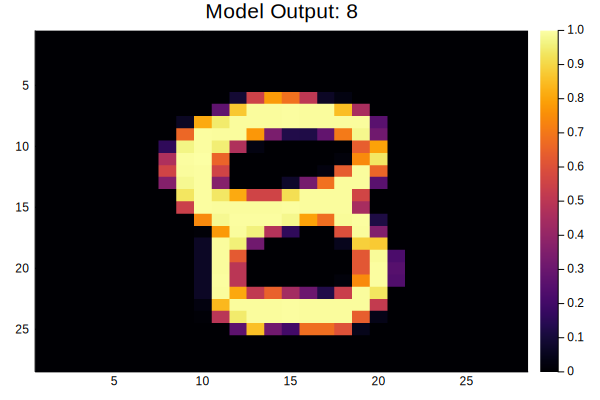

In [41]:
predictMNIST(model, dtrn)

In [22]:
using Images, Plots
function predictMNIST(model, data)
    i = rand(1:100)
    x = rand(data)[1][:,i]
    out = argmax(model(x)); if out==10; out = 0; end
    plot(heatmap(permutedims(reshape(x, 28, 28))), yflip = true, title = ("Model Output: " * string(out)))
end

┌ Info: Recompiling stale cache file /Users/egeersu/.julia/compiled/v1.2/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1240


predictMNIST (generic function with 1 method)